In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

c:\ProgramData\Anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [14]:
def convert_spectrogram(file_name, category, img_name):
    # Load audio and convert to spectrogram
    y, sr = librosa.load(file_name)
    spec = librosa.feature.melspectrogram(y = y, sr = sr, n_mels = 400, fmax = 10000)
    S_db = librosa.power_to_db(spec, ref=np.max)
    plt.figure(figsize = (4, 4), dpi = 100)
    librosa.display.specshow(S_db, x_axis = None, y_axis = None, sr = sr, fmax = 10000)

    # Adjust plot to remove margins
    plt.axis('off')
    plt.xticks([]), plt.yticks([])
    plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)

    # Check path and create image folder if needed
    dir = Path(f'./spectograms/{category}')
    if not dir.exists(): os.makedirs(dir)
    
    # Save plot as png
    plt.savefig(dir / f'{img_name}.png', bbox_inches = 'tight', pad_inches = 0, dpi = 100)

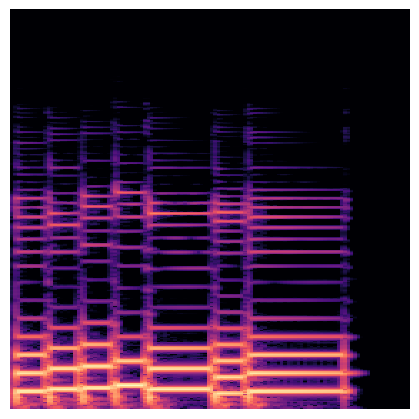

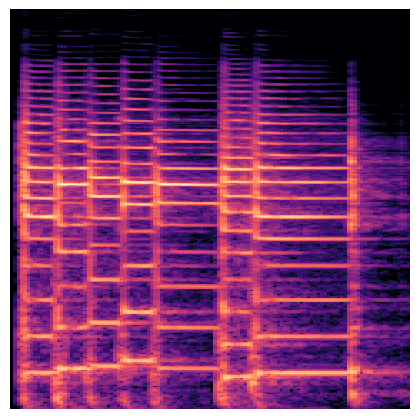

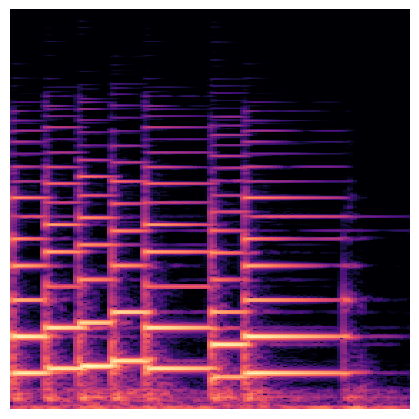

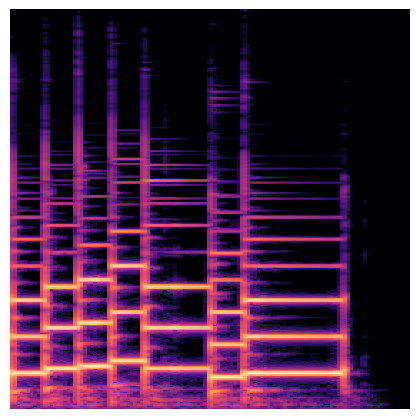

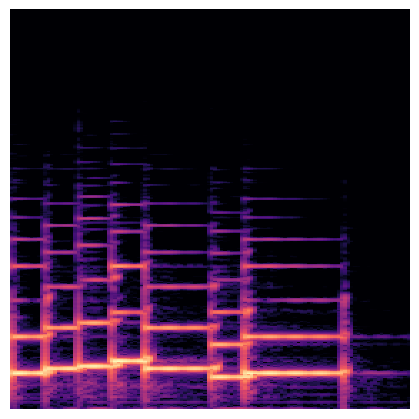

In [15]:
for dir in Path('./audio').rglob('*.wav'):
    convert_spectrogram(dir, 'test', dir.stem)